# 1. Informações: cidades do estudo e variáveis climáticas

* Estações do INMET: dados de 01/01/2008 à 31/12/2022 (15 anos) 

    1- Paraná - TO (A010); 

    2- Imperatriz - MA (A225);

    3- Bom Jesus do Piauí - PI (A326);

    4- Luíz Eduardo Magalhães - BA (A404);

    5- Casa Branca - SP (A738).

* Variáveis climáticas:
    
    1- Tmax (ºC);

    2- Tmin (ºC);

    3- URmax (%);

    4- URmin (%);

    5- vento (velocidade do vento em metros por segundo (m/s));
    
    6- Rad (Kilojoules por hora (kJ/h)).

# 2. Análise estatística: dados brutos

In [28]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import datetime as dt
import scipy.stats as stats
import seaborn as sns
from datetime import date, datetime

import warnings
warnings.filterwarnings('ignore')

In [29]:
# Carregar as funções:

%run "./plot_graphic.ipynb"
#%run "./DP_find_extreme_values.ipynb"
%run "./IQR_find_extreme_values.ipynb"

In [30]:
pd.set_option('float_format', '{:.2f}'.format)
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 30)

In [31]:
# Selecionar a cidade:

# df=pd.read_csv('./Dados_Estacoes/A010.csv', sep = ';') # Paraná - TO (A010)
# df=pd.read_csv('./Dados_Estacoes/A225.csv', sep = ';') # Imperatriz - MA (A225)
# df=pd.read_csv('./Dados_Estacoes/A326.csv', sep = ';') # Bom Jesus do Piauí - PI (A326)
# df=pd.read_csv('./Dados_Estacoes/A404.csv', sep = ';') # Luíz Eduardo Magalhães - BA (A404)
df=pd.read_csv('./Dados_Estacoes/A738.csv', sep = ';') # Casa Branca - SP (A738)

print("Linhas x Colunas: ", df.shape) # linhas x colunas
print("\nTipo de dado: ", type(df)) # tipo de dado
print("\nNome das colunas: ", df.columns) # nome das colunas
print("\nInformações: ")
df.info()

Linhas x Colunas:  (131496, 9)

Tipo de dado:  <class 'pandas.core.frame.DataFrame'>

Nome das colunas:  Index(['Data', 'Hora', 'Prec', 'Rad', 'Tmax', 'Tmin', 'Urmax', 'Urmin',
       'vento'],
      dtype='object')

Informações: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131496 entries, 0 to 131495
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Data    131496 non-null  object 
 1   Hora    131496 non-null  int64  
 2   Prec    107201 non-null  float64
 3   Rad     121329 non-null  float64
 4   Tmax    121438 non-null  float64
 5   Tmin    121438 non-null  float64
 6   Urmax   119590 non-null  float64
 7   Urmin   119998 non-null  float64
 8   vento   121445 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 9.0+ MB


In [32]:
print(df.head(3)) # primeiras linhas
print("\n")
print(df.tail(3)) # últimas linhas
# df_A010 # todo o dataframe
df[['Prec','Rad','Tmax','Tmin','Urmax','Urmin','vento']].describe()

         Data  Hora  Prec      Rad  Tmax  Tmin  Urmax  Urmin  vento
0  2008-01-01     0   NaN -3539.00 24.30 23.60  60.00  55.00   3.00
1  2008-01-01   100   NaN -3526.00 24.50 23.50  62.00  53.00   2.20
2  2008-01-01   200   NaN  -877.00 25.70 23.70  64.00  51.00   0.00


              Data  Hora  Prec       Rad  Tmax  Tmin  Urmax  Urmin  vento
131493  2022-12-31  2100  0.00 541957.00 30.60 27.50  62.00  50.00   3.00
131494  2022-12-31  2200  0.00      9.51 27.60 25.60  72.00  62.00   3.00
131495  2022-12-31  2300  0.00  -3488.00 25.90 24.80  76.00  70.00   2.50


,Prec,Rad,Tmax,Tmin,Urmax,Urmin,vento
count,107201.00,121329.00,121438.00,121438.00,119590.00,119998.00,121445.00
mean,0.12,780584.00,24.55,22.95,67.93,61.54,2.45
std,1.19,1141701.70,4.74,4.52,21.53,22.38,1.71
min,0.00,-9809.00,10.60,8.90,10.00,10.00,0.00
25%,0.00,-3.54,20.90,19.90,51.00,43.00,1.10
50%,0.00,1745.54,23.80,22.20,71.00,62.00,2.40
75%,0.00,1509822.00,28.40,26.40,88.00,82.00,3.60
max,57.80,4980088.00,39.90,37.00,100.00,100.00,12.50


# 3. Análise estatística: dados pré-processados

In [33]:
# Inserir novas colunas:
df.insert(9, 'PREC', '', allow_duplicates=False)
df.insert(10, 'RAD', '', allow_duplicates=False)
df.insert(11, 'TMAX', '', allow_duplicates=False)
df.insert(12, 'TMIN', '', allow_duplicates=False)
df.insert(13, 'URMAX', '', allow_duplicates=False)
df.insert(14, 'URMIN', '', allow_duplicates=False)
df.insert(15, 'U', '', allow_duplicates=False)

df.head(25)

,Data,Hora,Prec,Rad,Tmax,Tmin,Urmax,Urmin,vento,PREC,RAD,TMAX,TMIN,URMAX,URMIN,U
0,2008-01-01,0,NaN,-3539.00,24.30,23.60,60.00,55.00,3.00,,,,,,,
1,2008-01-01,100,NaN,-3526.00,24.50,23.50,62.00,53.00,2.20,,,,,,,
2,2008-01-01,200,NaN,-877.00,25.70,23.70,64.00,51.00,0.00,,,,,,,
3,2008-01-01,300,NaN,-3516.00,23.90,22.60,70.00,62.00,1.00,,,,,,,
4,2008-01-01,400,NaN,-3439.00,22.60,21.70,74.00,68.00,2.10,,,,,,,
5,2008-01-01,500,NaN,-3539.00,23.00,22.40,68.00,63.00,0.20,,,,,,,
6,2008-01-01,600,NaN,-3481.00,22.60,21.10,76.00,64.00,2.30,,,,,,,
7,2008-01-01,700,NaN,-3407.00,22.50,21.10,77.00,66.00,0.00,,,,,,,
8,2008-01-01,800,NaN,-2651.00,22.40,20.80,78.00,66.00,2.30,,,,,,,
9,2008-01-01,900,NaN,3709.00,22.50,21.90,67.00,62.00,2.30,,,,,,,


In [34]:
# 1º) Radiação negativa será igual a NaN:
df['Rad'].where(~(df['Rad'] < 0), other=math.nan, inplace=True)
df.head(25)

,Data,Hora,Prec,Rad,Tmax,Tmin,Urmax,Urmin,vento,PREC,RAD,TMAX,TMIN,URMAX,URMIN,U
0,2008-01-01,0,NaN,NaN,24.30,23.60,60.00,55.00,3.00,,,,,,,
1,2008-01-01,100,NaN,NaN,24.50,23.50,62.00,53.00,2.20,,,,,,,
2,2008-01-01,200,NaN,NaN,25.70,23.70,64.00,51.00,0.00,,,,,,,
3,2008-01-01,300,NaN,NaN,23.90,22.60,70.00,62.00,1.00,,,,,,,
4,2008-01-01,400,NaN,NaN,22.60,21.70,74.00,68.00,2.10,,,,,,,
5,2008-01-01,500,NaN,NaN,23.00,22.40,68.00,63.00,0.20,,,,,,,
6,2008-01-01,600,NaN,NaN,22.60,21.10,76.00,64.00,2.30,,,,,,,
7,2008-01-01,700,NaN,NaN,22.50,21.10,77.00,66.00,0.00,,,,,,,
8,2008-01-01,800,NaN,NaN,22.40,20.80,78.00,66.00,2.30,,,,,,,
9,2008-01-01,900,NaN,3709.00,22.50,21.90,67.00,62.00,2.30,,,,,,,


In [35]:
# Soma: PREC e RAD:
df.loc[0:23, "PREC"] = np.nansum(df.loc[0:23,"Prec"])

# 2º) Correção da radiação: kJ m-2 dia-1 para MJ m-2 dia-1
df.loc[0:23,  "RAD"] = (np.nanmean(df.loc[0:23,"Rad"]))/1000

# Média: TMAX e TMIN:
df.loc[0:23, "TMAX"] = np.nanmean(df.loc[0:23,"Tmax"])
df.loc[0:23, "TMIN"] = np.nanmean(df.loc[0:23,"Tmin"])

# Média: URMAX e URMIN:
df.loc[0:23,"URMAX"] = np.nanmean(df.loc[0:23,"Urmax"])
df.loc[0:23,"URMIN"] = np.nanmean(df.loc[0:23,"Urmin"])

# Média: U (vento):
df.loc[0:23,"U"] = np.nanmean(df.loc[0:23,"vento"])

df.head(25)

,Data,Hora,Prec,Rad,Tmax,Tmin,Urmax,Urmin,vento,PREC,RAD,TMAX,TMIN,URMAX,URMIN,U
0,2008-01-01,0,NaN,NaN,24.30,23.60,60.00,55.00,3.00,0.00,1627.16,26.99,25.33,57.46,49.38,2.34
1,2008-01-01,100,NaN,NaN,24.50,23.50,62.00,53.00,2.20,0.00,1627.16,26.99,25.33,57.46,49.38,2.34
2,2008-01-01,200,NaN,NaN,25.70,23.70,64.00,51.00,0.00,0.00,1627.16,26.99,25.33,57.46,49.38,2.34
3,2008-01-01,300,NaN,NaN,23.90,22.60,70.00,62.00,1.00,0.00,1627.16,26.99,25.33,57.46,49.38,2.34
4,2008-01-01,400,NaN,NaN,22.60,21.70,74.00,68.00,2.10,0.00,1627.16,26.99,25.33,57.46,49.38,2.34
5,2008-01-01,500,NaN,NaN,23.00,22.40,68.00,63.00,0.20,0.00,1627.16,26.99,25.33,57.46,49.38,2.34
6,2008-01-01,600,NaN,NaN,22.60,21.10,76.00,64.00,2.30,0.00,1627.16,26.99,25.33,57.46,49.38,2.34
7,2008-01-01,700,NaN,NaN,22.50,21.10,77.00,66.00,0.00,0.00,1627.16,26.99,25.33,57.46,49.38,2.34
8,2008-01-01,800,NaN,NaN,22.40,20.80,78.00,66.00,2.30,0.00,1627.16,26.99,25.33,57.46,49.38,2.34
9,2008-01-01,900,NaN,3709.00,22.50,21.90,67.00,62.00,2.30,0.00,1627.16,26.99,25.33,57.46,49.38,2.34


In [36]:
start = 24
finish = 47

for row in df.itertuples():
    df.loc[start:finish,"PREC"] = np.nansum(df.loc[start:finish,"Prec"])
    # 2º) Correção da radiação: kJ m-2 dia-1 para MJ m-2 dia-1
    df.loc[start:finish,"RAD"] = (np.nanmean(df.loc[start:finish,"Rad"]))/1000
    df.loc[start:finish,"TMAX"] = np.nanmean(df.loc[start:finish,"Tmax"])
    df.loc[start:finish,"TMIN"] = np.nanmean(df.loc[start:finish,"Tmin"])
    df.loc[start:finish,"URMAX"] = np.nanmean(df.loc[start:finish,"Urmax"])
    df.loc[start:finish,"URMIN"] = np.nanmean(df.loc[start:finish,"Urmin"])
    df.loc[start:finish,"U"] = np.nanmean(df.loc[start:finish,"vento"])
    
    start += 24
    finish += 24

df.head(25)

,Data,Hora,Prec,Rad,Tmax,Tmin,Urmax,Urmin,vento,PREC,RAD,TMAX,TMIN,URMAX,URMIN,U
0,2008-01-01,0,NaN,NaN,24.30,23.60,60.00,55.00,3.00,0.00,1627.16,26.99,25.33,57.46,49.38,2.34
1,2008-01-01,100,NaN,NaN,24.50,23.50,62.00,53.00,2.20,0.00,1627.16,26.99,25.33,57.46,49.38,2.34
2,2008-01-01,200,NaN,NaN,25.70,23.70,64.00,51.00,0.00,0.00,1627.16,26.99,25.33,57.46,49.38,2.34
3,2008-01-01,300,NaN,NaN,23.90,22.60,70.00,62.00,1.00,0.00,1627.16,26.99,25.33,57.46,49.38,2.34
4,2008-01-01,400,NaN,NaN,22.60,21.70,74.00,68.00,2.10,0.00,1627.16,26.99,25.33,57.46,49.38,2.34
5,2008-01-01,500,NaN,NaN,23.00,22.40,68.00,63.00,0.20,0.00,1627.16,26.99,25.33,57.46,49.38,2.34
6,2008-01-01,600,NaN,NaN,22.60,21.10,76.00,64.00,2.30,0.00,1627.16,26.99,25.33,57.46,49.38,2.34
7,2008-01-01,700,NaN,NaN,22.50,21.10,77.00,66.00,0.00,0.00,1627.16,26.99,25.33,57.46,49.38,2.34
8,2008-01-01,800,NaN,NaN,22.40,20.80,78.00,66.00,2.30,0.00,1627.16,26.99,25.33,57.46,49.38,2.34
9,2008-01-01,900,NaN,3709.00,22.50,21.90,67.00,62.00,2.30,0.00,1627.16,26.99,25.33,57.46,49.38,2.34


In [37]:
# Criar novo dataframe com cópia do df anterior:
new_df = df[['Data','PREC','RAD','TMAX','TMIN','URMAX','URMIN','U']].copy()
pd.DataFrame(new_df)
# new_df.head(25)
# print("Linhas x Colunas: ", new_df.shape)
new_df

,Data,PREC,RAD,TMAX,TMIN,URMAX,URMIN,U
0,2008-01-01,0.00,1627.16,26.99,25.33,57.46,49.38,2.34
1,2008-01-01,0.00,1627.16,26.99,25.33,57.46,49.38,2.34
2,2008-01-01,0.00,1627.16,26.99,25.33,57.46,49.38,2.34
3,2008-01-01,0.00,1627.16,26.99,25.33,57.46,49.38,2.34
4,2008-01-01,0.00,1627.16,26.99,25.33,57.46,49.38,2.34
...,...,...,...,...,...,...,...,...
131491,2022-12-31,0.00,1662.70,26.16,24.52,76.75,72.18,1.52
131492,2022-12-31,0.00,1662.70,26.16,24.52,76.75,72.18,1.52
131493,2022-12-31,0.00,1662.70,26.16,24.52,76.75,72.18,1.52
131494,2022-12-31,0.00,1662.70,26.16,24.52,76.75,72.18,1.52


In [38]:
# Eliminar linhas duplicadas:
new_df.drop_duplicates(inplace=True)

# Resetar o índice sem criar uma nova coluna:
new_df = new_df.reset_index(drop=True)
new_df

,Data,PREC,RAD,TMAX,TMIN,URMAX,URMIN,U
0,2008-01-01,0.00,1627.16,26.99,25.33,57.46,49.38,2.34
1,2008-01-02,0.00,1789.26,26.11,24.55,68.33,60.54,2.12
2,2008-01-03,0.00,1577.14,26.35,24.97,67.71,60.88,2.22
3,2008-01-04,0.00,2698.70,26.74,25.10,55.46,47.83,2.65
4,2008-01-05,0.00,2521.71,26.76,24.68,41.71,34.38,2.55
...,...,...,...,...,...,...,...,...
5474,2022-12-27,0.20,1306.76,24.56,23.23,82.60,78.18,1.74
5475,2022-12-28,0.00,1743.23,25.10,23.80,77.56,73.20,1.76
5476,2022-12-29,0.00,1794.10,25.12,23.64,75.88,70.61,1.50
5477,2022-12-30,0.00,1634.07,25.66,24.00,78.90,73.52,1.59


In [39]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5479 entries, 0 to 5478
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    5479 non-null   object
 1   PREC    5479 non-null   object
 2   RAD     5114 non-null   object
 3   TMAX    5115 non-null   object
 4   TMIN    5115 non-null   object
 5   URMAX   5115 non-null   object
 6   URMIN   5115 non-null   object
 7   U       5115 non-null   object
dtypes: object(8)
memory usage: 342.6+ KB


In [40]:
# Converter de object para float64:

new_df['PREC'] = new_df['PREC'].astype(float)
new_df['RAD'] = new_df['RAD'].astype(float)

new_df['TMAX'] = new_df['TMAX'].astype(float)
new_df['TMIN'] = new_df['TMIN'].astype(float)

new_df['URMAX'] = new_df['URMAX'].astype(float)
new_df['URMIN'] = new_df['URMIN'].astype(float)

new_df['U'] = new_df['U'].astype(float)

new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5479 entries, 0 to 5478
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Data    5479 non-null   object 
 1   PREC    5479 non-null   float64
 2   RAD     5114 non-null   float64
 3   TMAX    5115 non-null   float64
 4   TMIN    5115 non-null   float64
 5   URMAX   5115 non-null   float64
 6   URMIN   5115 non-null   float64
 7   U       5115 non-null   float64
dtypes: float64(7), object(1)
memory usage: 342.6+ KB


In [41]:
# Realizar pesquisa nos dados para saber se será necessário a correção:
# PREC:
print('PREC < 0: ', new_df.query("PREC < 0"))
print('\nPREC > 450: ', new_df.query("PREC > 450"))

# TMAX:
print('\nTMAX <= -30: ', new_df.query("TMAX <= -30"))

# TMIN:
print('\nTMIN > 50: ', new_df.query("TMIN > 50"))

PREC < 0:  Empty DataFrame
Columns: [Data, PREC, RAD, TMAX, TMIN, URMAX, URMIN, U]
Index: []

PREC > 450:  Empty DataFrame
Columns: [Data, PREC, RAD, TMAX, TMIN, URMAX, URMIN, U]
Index: []

TMAX <= -30:  Empty DataFrame
Columns: [Data, PREC, RAD, TMAX, TMIN, URMAX, URMIN, U]
Index: []

TMIN > 50:  Empty DataFrame
Columns: [Data, PREC, RAD, TMAX, TMIN, URMAX, URMIN, U]
Index: []


In [42]:
# URMAX:
print('\nURMAX > 100: ', new_df.query("URMAX > 100"))

# URMIN:
print('\nURMIN < 0: ', new_df.query("URMIN < 0"))

# U:
print('\nU < 0: ', new_df.query("U < 0"))
print('\nU > 100: ', new_df.query("U > 100"))


URMAX > 100:  Empty DataFrame
Columns: [Data, PREC, RAD, TMAX, TMIN, URMAX, URMIN, U]
Index: []

URMIN < 0:  Empty DataFrame
Columns: [Data, PREC, RAD, TMAX, TMIN, URMAX, URMIN, U]
Index: []

U < 0:  Empty DataFrame
Columns: [Data, PREC, RAD, TMAX, TMIN, URMAX, URMIN, U]
Index: []

U > 100:  Empty DataFrame
Columns: [Data, PREC, RAD, TMAX, TMIN, URMAX, URMIN, U]
Index: []


In [43]:
new_df[['PREC','RAD','TMAX','TMIN','URMAX','URMIN','U']].describe()

,PREC,RAD,TMAX,TMIN,URMAX,URMIN,U
count,5479.00,5114.00,5115.00,5115.00,5115.00,5115.00,5115.00
mean,2.36,1477.89,24.58,22.98,68.23,61.76,2.45
std,7.94,397.19,1.93,1.81,15.42,15.81,1.04
min,0.00,0.65,18.68,17.20,26.25,21.50,0.00
25%,0.00,1244.53,23.18,21.73,56.67,49.71,1.76
50%,0.00,1514.27,24.36,22.86,69.58,62.64,2.34
75%,0.00,1736.93,25.79,24.13,81.04,74.67,3.08
max,98.00,4859.70,34.10,33.10,98.79,97.84,6.07


In [44]:
# Salvar o dataframe pré-processado:

# new_df.to_csv('./Dados_Processados/A010_PP.csv')
# new_df.to_csv('./Dados_Processados/A225_PP.csv')
# new_df.to_csv('./Dados_Processados/A326_PP.csv')
# new_df.to_csv('./Dados_Processados/A404_PP.csv')
new_df.to_csv('./Dados_Processados/A738_PP.csv')

# 4. Detectar os pontos extremos 

## 4.1. Estatística descritiva: Histogramas x Gráfico Quantil x Boxplot

In [45]:
# Medir o grau de simetria da curva, em relação a distribuição normal:
# Se skew = 0 -> distribuição simétrica;
# Se skew > 0 -> assimétrica positiva (à direita);
# Se skew < 0 -> assimétrica negativa (à esquerda).

print('PREC:', new_df['PREC'].skew())
print('RAD:', new_df['RAD'].skew())
print('TMAX:', new_df['TMAX'].skew())
print('TMIN:', new_df['TMIN'].skew())
print('URMAX:', new_df['URMAX'].skew())
print('URMIN:', new_df['URMIN'].skew())
print('U:', new_df['U'].skew())

PREC: 5.221626483790017
RAD: -0.20090390877132255
TMAX: 0.48035993044290604
TMIN: 0.3653430344870209
URMAX: -0.32412444619775616
URMIN: -0.21318094023934797
U: 0.3674000533021914


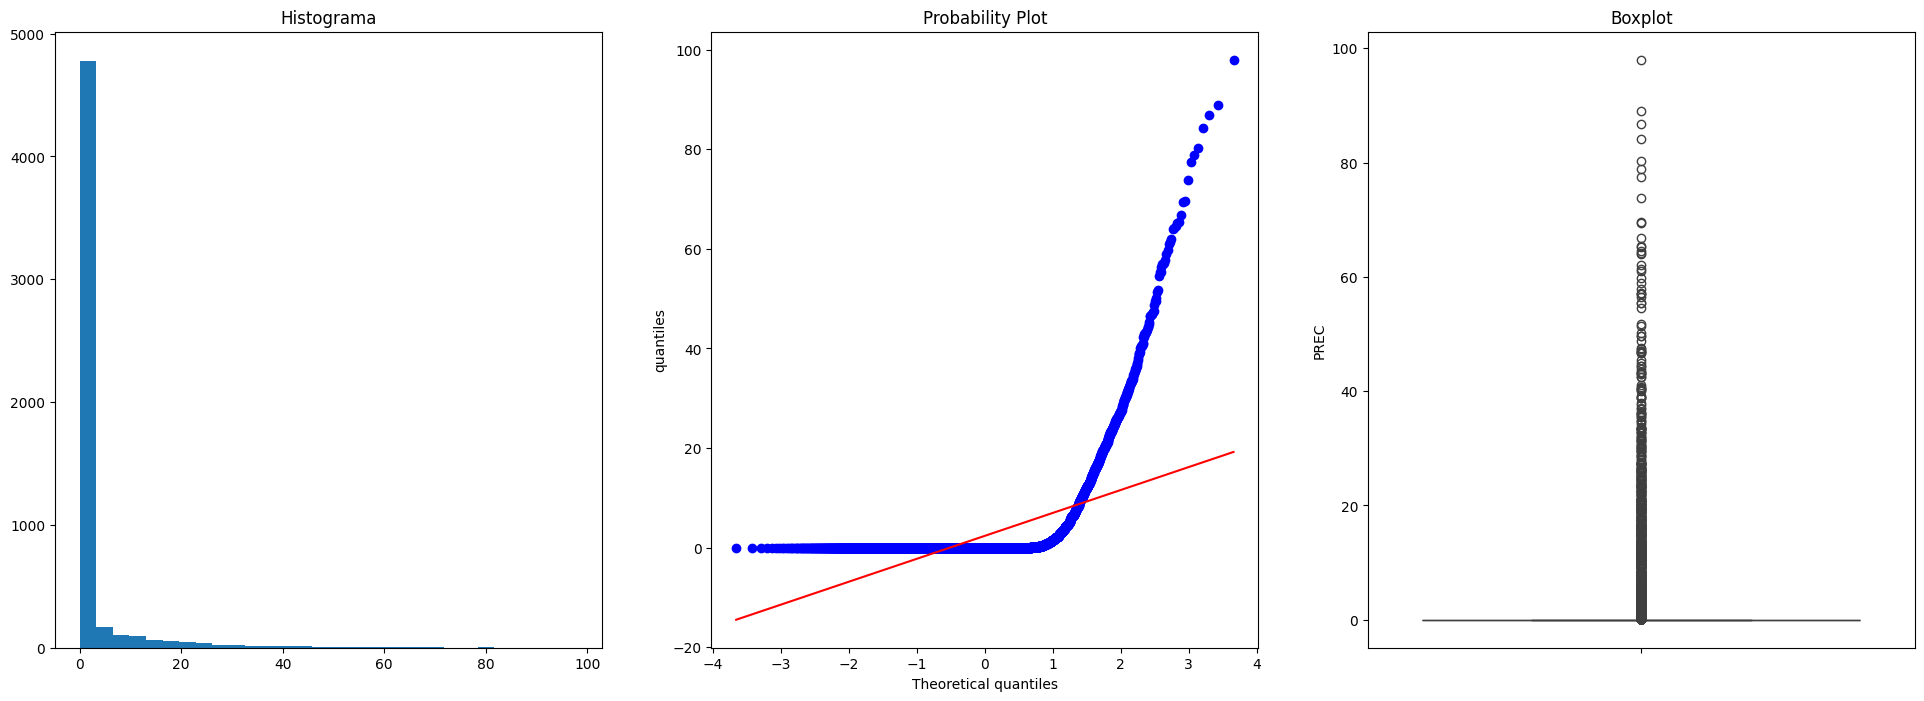

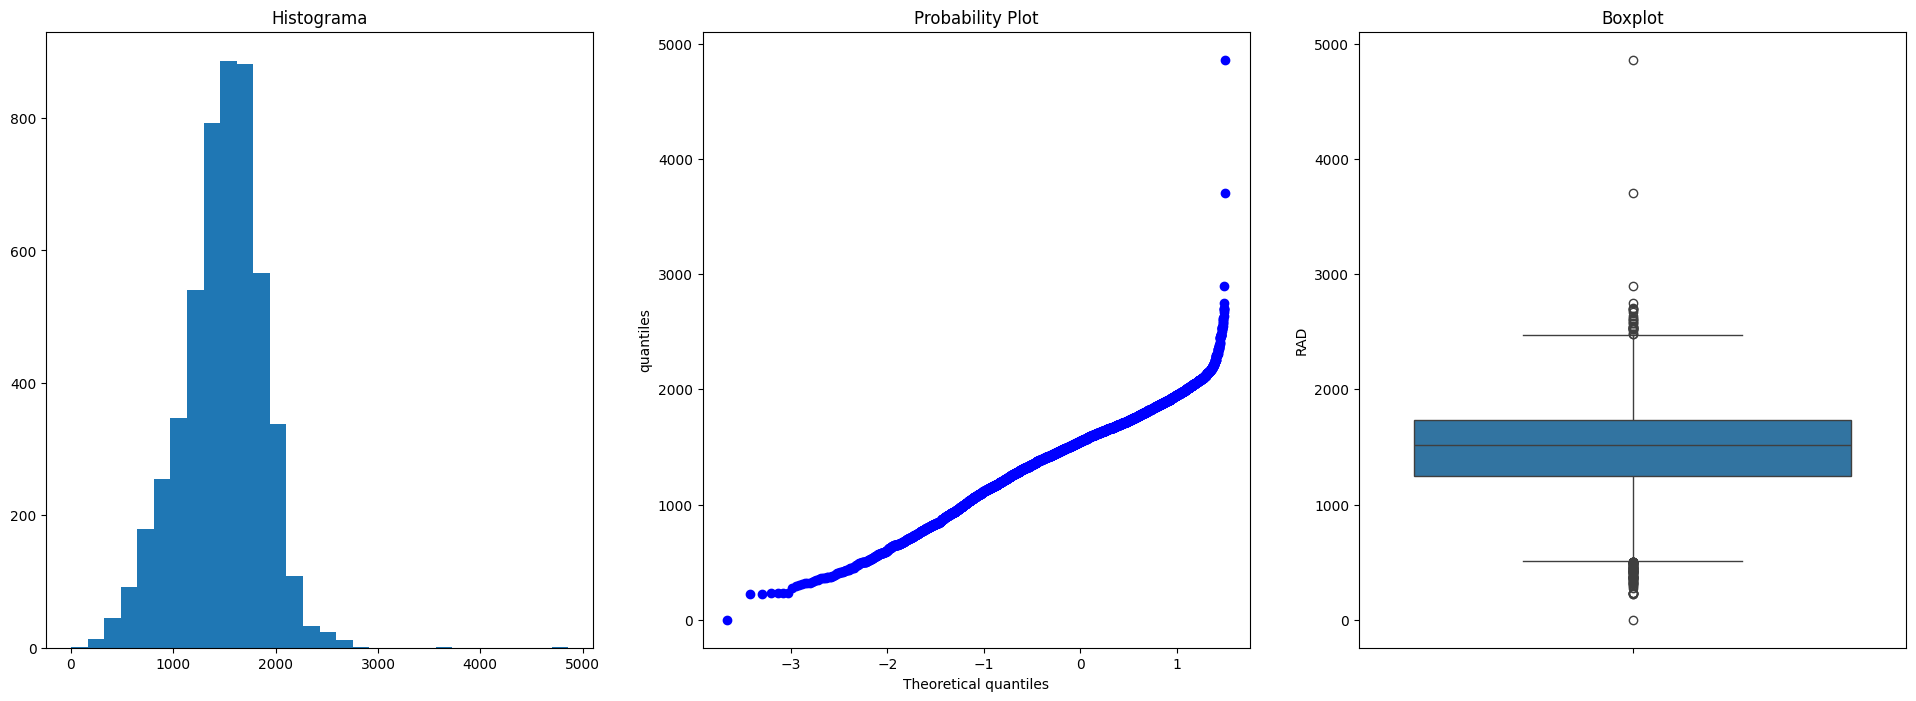

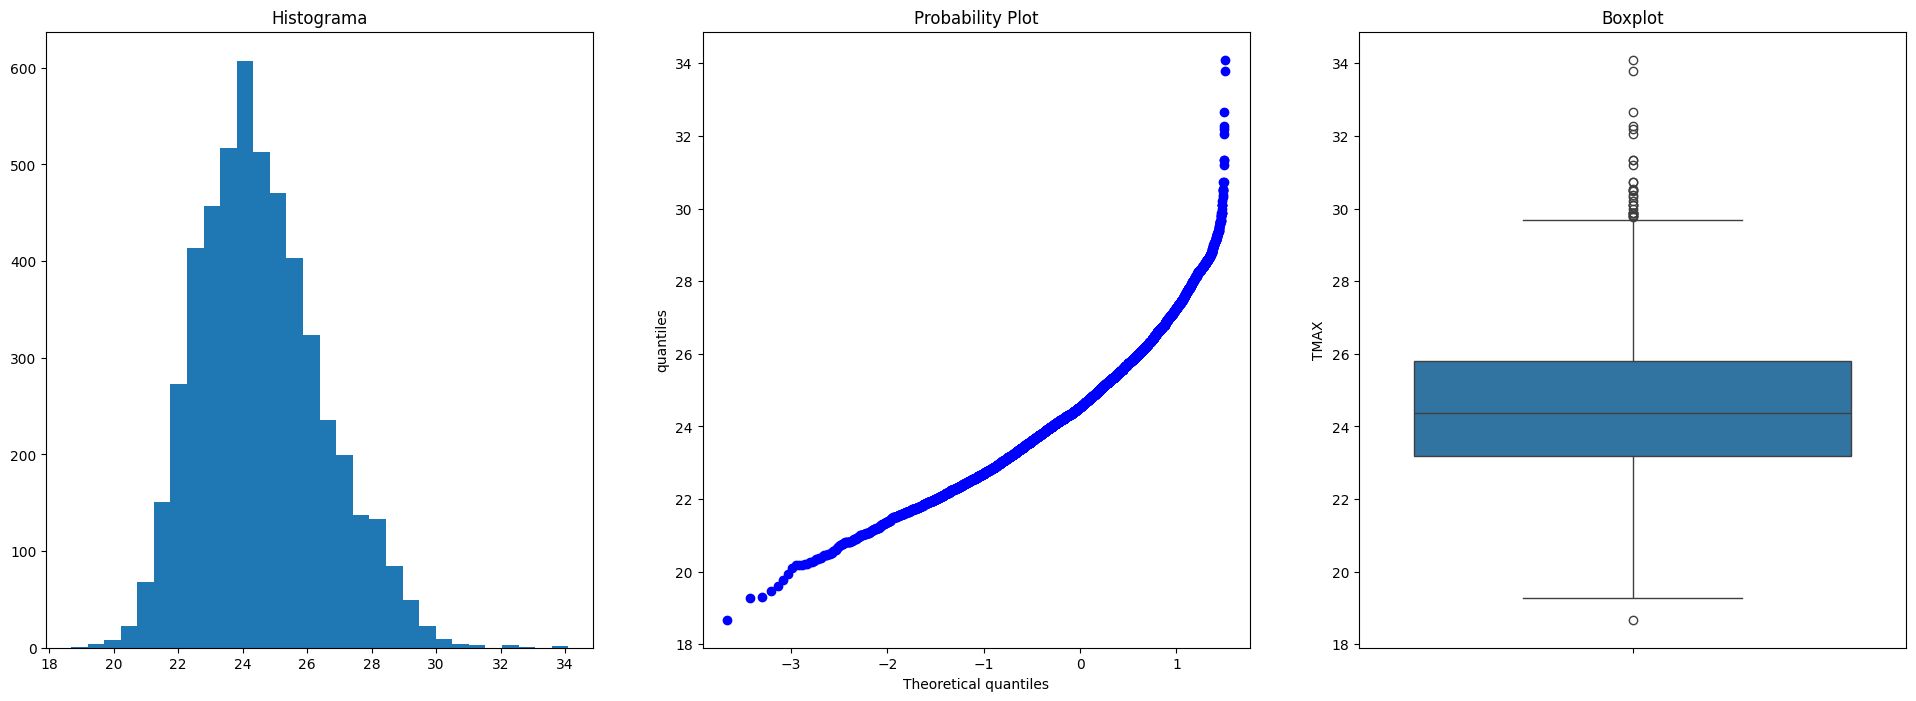

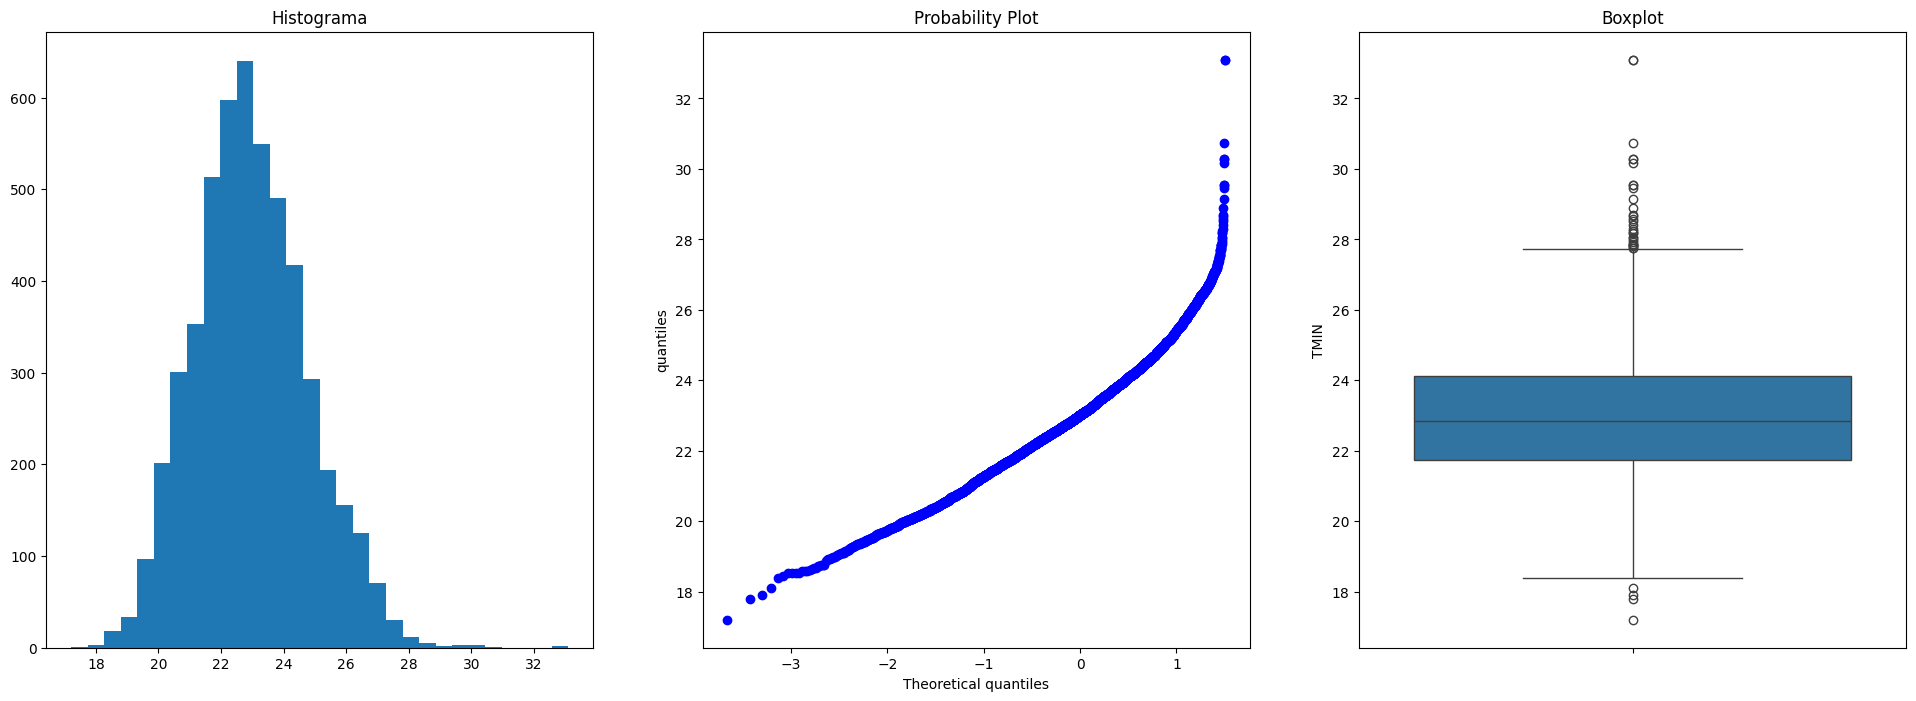

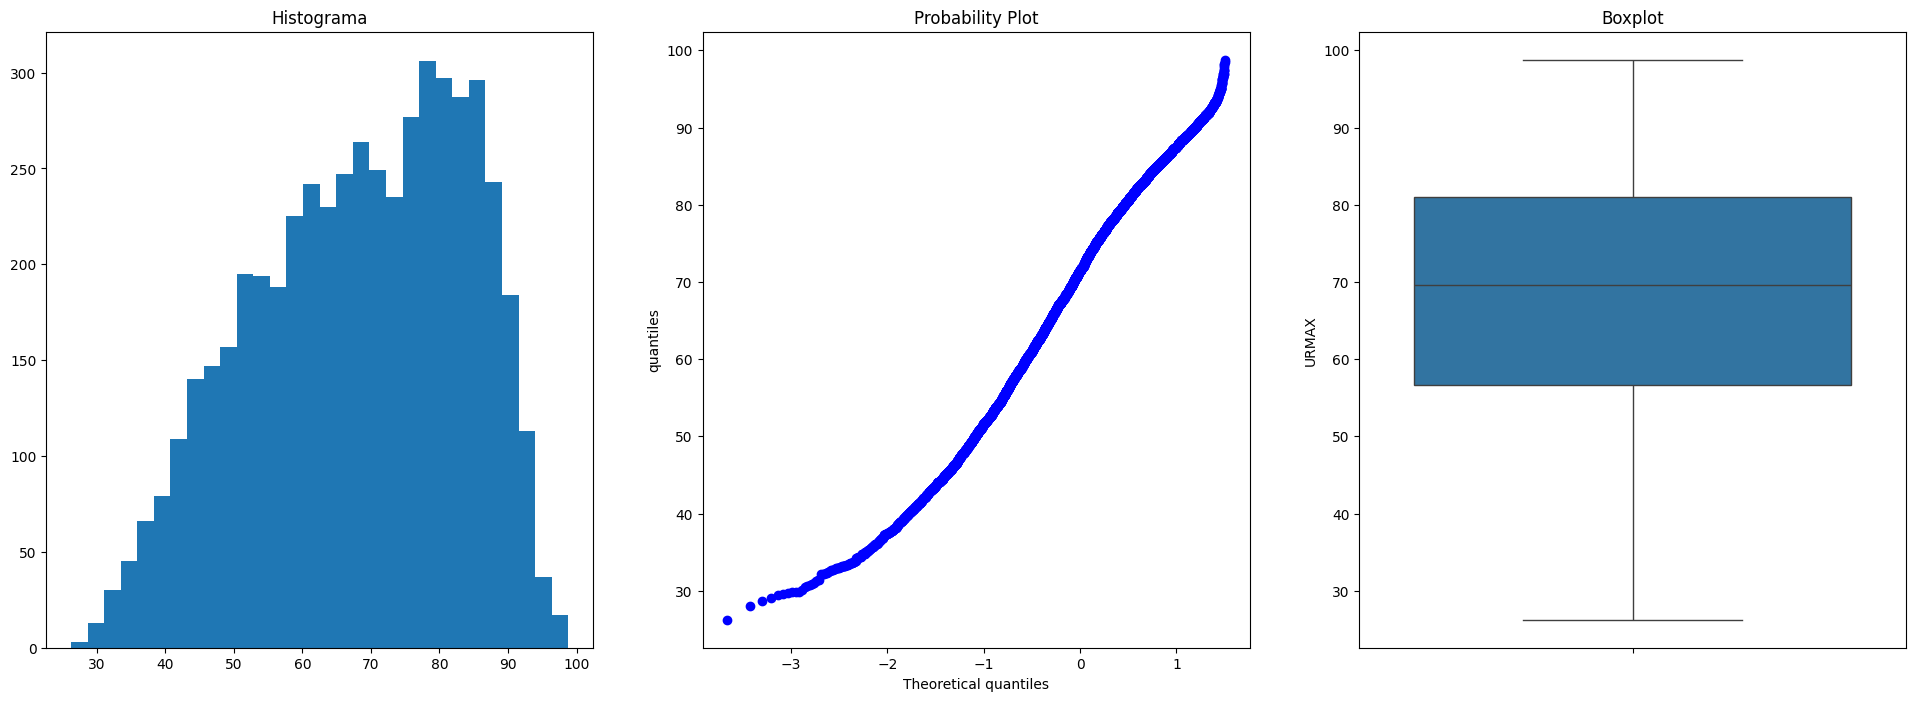

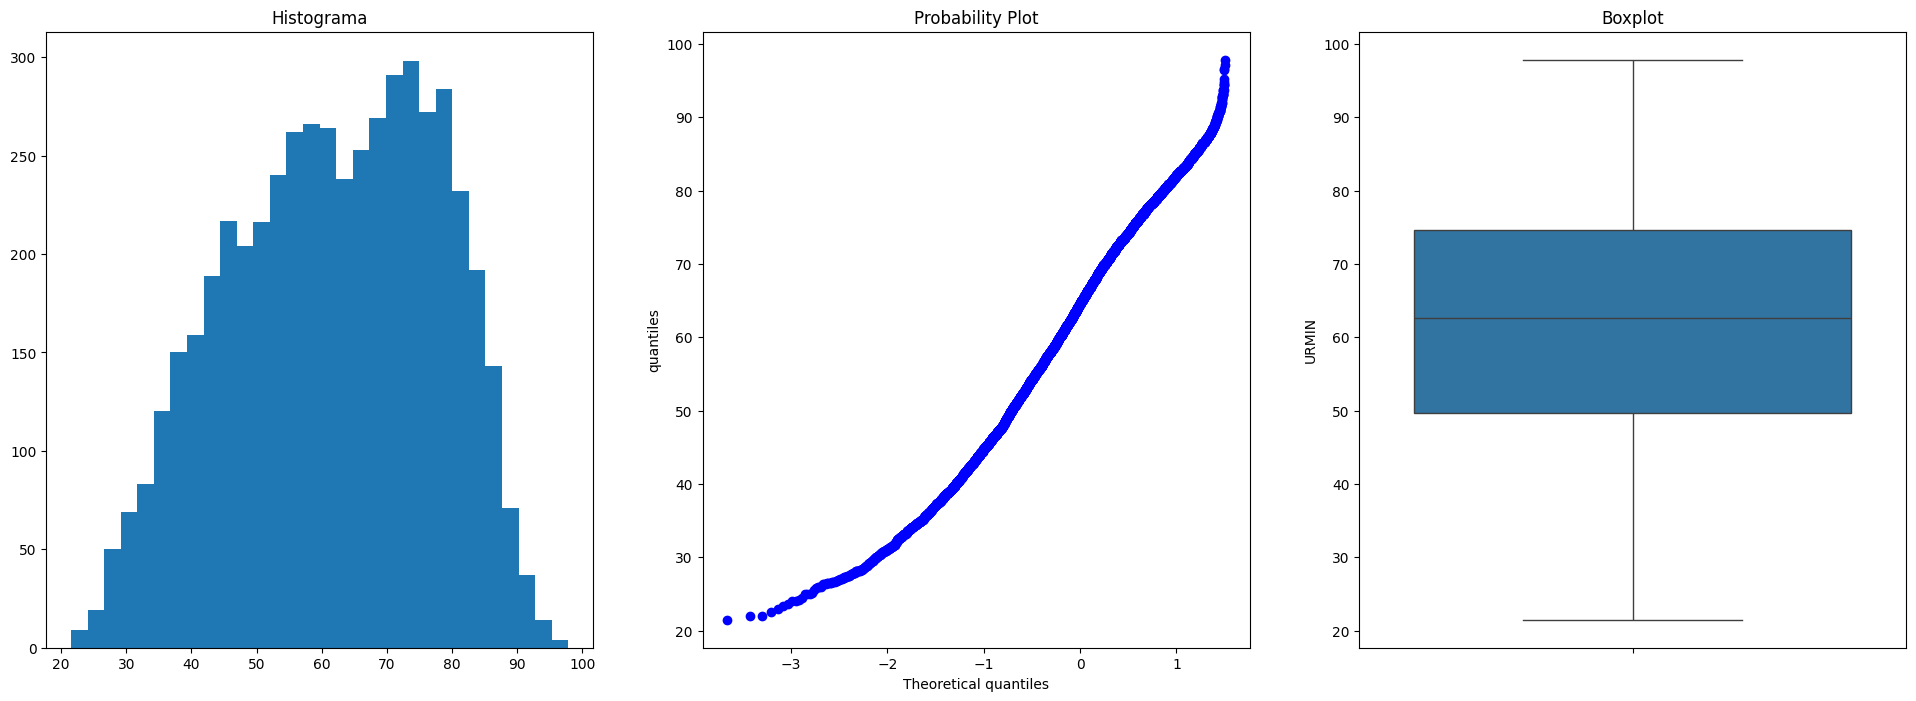

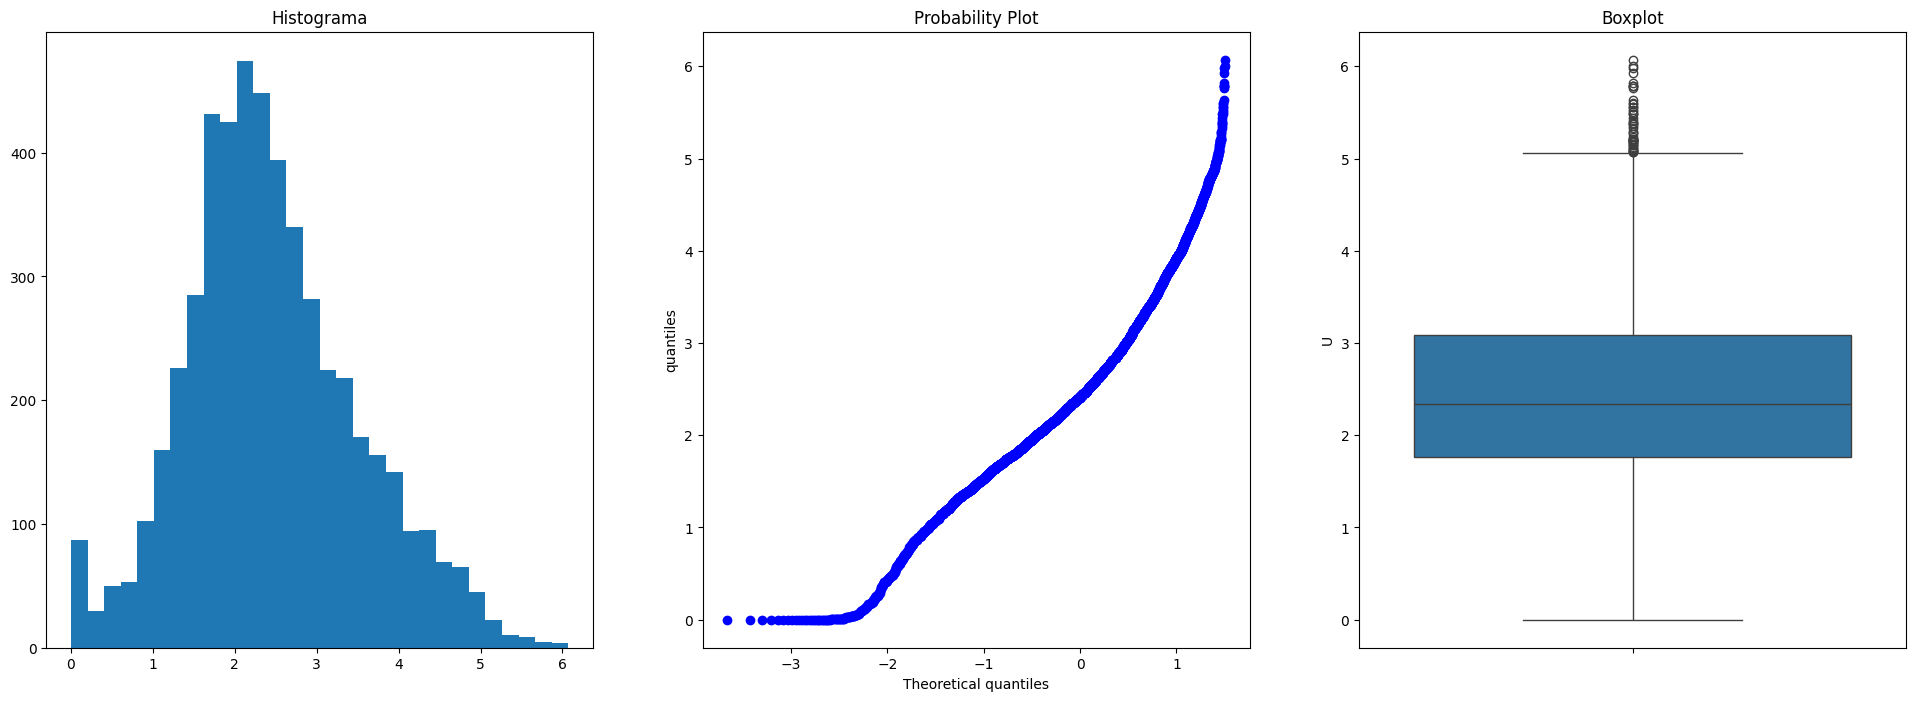

In [46]:
# Plotar os gráficos:

plot_graphic(new_df,'PREC')
plot_graphic(new_df,'RAD')
plot_graphic(new_df,'TMAX')
plot_graphic(new_df,'TMIN')
plot_graphic(new_df,'URMAX')
plot_graphic(new_df,'URMIN')
plot_graphic(new_df,'U')

In [47]:
IQR_find_extreme_values(new_df,'PREC', 1.5)

MÉTODO DO INTERVALO INTERQUARTIL OU IQR
-----------------------------------------
PREC
3º quartil: 0.0
1º quartil: 0.0
LS de PREC : 0.0
LI de PREC : 0.0
Qtd acima de LS: 1369
Qtd abaixo de LI: 0
LS(%): 0.5757350189037904
LI(%): 0.0
-----------------------------------------


In [48]:
IQR_find_extreme_values(new_df,'RAD', 1.5)

MÉTODO DO INTERVALO INTERQUARTIL OU IQR
-----------------------------------------
RAD
3º quartil: 1736.9289166666667
1º quartil: 1244.5274008974359
LS de RAD : 2475.531190320513
LI de RAD : 505.9251272435896
Qtd acima de LS: 27
Qtd abaixo de LI: 73
LS(%): 0.011354890803800104
LI(%): 0.030700260321385463
-----------------------------------------


In [49]:
IQR_find_extreme_values(new_df,'TMAX', 1.5)

MÉTODO DO INTERVALO INTERQUARTIL OU IQR
-----------------------------------------
TMAX
3º quartil: 25.791666666666668
1º quartil: 23.175
LS de TMAX : 29.71666666666667
LI de TMAX : 19.25
Qtd acima de LS: 30
Qtd abaixo de LI: 1
LS(%): 0.01261654533755567
LI(%): 0.0004205515112518557
-----------------------------------------


In [50]:
IQR_find_extreme_values(new_df,'TMIN', 1.5)

MÉTODO DO INTERVALO INTERQUARTIL OU IQR
-----------------------------------------
TMIN
3º quartil: 24.129166666666663
1º quartil: 21.725
LS de TMIN : 27.735416666666655
LI de TMIN : 18.11875000000001
Qtd acima de LS: 31
Qtd abaixo de LI: 4
LS(%): 0.013037096848807526
LI(%): 0.0016822060450074228
-----------------------------------------


In [51]:
IQR_find_extreme_values(new_df,'URMAX', 1.5)

MÉTODO DO INTERVALO INTERQUARTIL OU IQR
-----------------------------------------
URMAX
3º quartil: 81.04166666666667
1º quartil: 56.666666666666664
LS de URMAX : 117.60416666666669
LI de URMAX : 20.10416666666665
Qtd acima de LS: 0
Qtd abaixo de LI: 0
LS(%): 0.0
LI(%): 0.0
-----------------------------------------


In [52]:
IQR_find_extreme_values(new_df,'URMIN', 1.5)

MÉTODO DO INTERVALO INTERQUARTIL OU IQR
-----------------------------------------
URMIN
3º quartil: 74.66666666666667
1º quartil: 49.708333333333336
LS de URMIN : 112.10416666666667
LI de URMIN : 12.270833333333336
Qtd acima de LS: 0
Qtd abaixo de LI: 0
LS(%): 0.0
LI(%): 0.0
-----------------------------------------


In [53]:
IQR_find_extreme_values(new_df,'U', 1.5)

MÉTODO DO INTERVALO INTERQUARTIL OU IQR
-----------------------------------------
U
3º quartil: 3.0833333333333335
1º quartil: 1.763068181818182
LS de U : 5.063731060606061
LI de U : -0.21732954545454541
Qtd acima de LS: 50
Qtd abaixo de LI: 0
LS(%): 0.021027575562592785
LI(%): 0.0
-----------------------------------------


# 5. Local Outlier Factor(LOF)

In [54]:
# Comparação entre IQR e LOF:

from sklearn.neighbors import LocalOutlierFactor

def outliers_find(df,x):
    q1  =  df[x].quantile(.25)
    q3  =  df[x].quantile(.75)
    iqr = q3-q1
    df['IQR']  = np.where(df[[x]]<(q1-1.5*iqr),-1, np.where(df[[x]]>(q3+1.5*iqr),-1,1))
    df['LOF'] = LocalOutlierFactor(n_neighbors=20, novelty=True).fit(df[[x]]).predict(df[[x]])   
    return df

outliers_find(new_df,'PREC')

,Data,PREC,RAD,TMAX,TMIN,URMAX,URMIN,U,IQR,LOF
0,2008-01-01,0.00,1627.16,26.99,25.33,57.46,49.38,2.34,1,1
1,2008-01-02,0.00,1789.26,26.11,24.55,68.33,60.54,2.12,1,1
2,2008-01-03,0.00,1577.14,26.35,24.97,67.71,60.88,2.22,1,1
3,2008-01-04,0.00,2698.70,26.74,25.10,55.46,47.83,2.65,1,1
4,2008-01-05,0.00,2521.71,26.76,24.68,41.71,34.38,2.55,1,1
...,...,...,...,...,...,...,...,...,...,...
5474,2022-12-27,0.20,1306.76,24.56,23.23,82.60,78.18,1.74,-1,1
5475,2022-12-28,0.00,1743.23,25.10,23.80,77.56,73.20,1.76,1,1
5476,2022-12-29,0.00,1794.10,25.12,23.64,75.88,70.61,1.50,1,1
5477,2022-12-30,0.00,1634.07,25.66,24.00,78.90,73.52,1.59,1,1


---
## Autoras:

* Profª. Drª. Patricia Angélica Alves Marques | **e-mail**: paamarques@usp.br 

* Doutoranda: Ângela Silviane Moura Cunha | **e-mail**: angelasilviane@usp.br